# Carpark Problem Replicator Simulation

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import time

In [5]:
popSize=1000

In this scenario, we are working under the assumption that the total population size is 1000. However, this population is divided into 5 groups, resulting in 200 individuals arriving simultaneously!

In [6]:
n = 5
d1 = 20
d2 = 2
beta1 = 1
beta2 = 5

In [7]:
def payoffGame(G):
    num_at_A = sum(G)
    num_at_B = n - sum(G)
    payoffs = np.where(G==1,1/(d1+ beta1* num_at_A),1/(d2+ beta2* num_at_B))
    return (payoffs)

In [8]:
def oneRound():
    global population
    np.random.shuffle(population)
    allGames = np.split(population,popSize/n)
    allPayoff = np.array(list(map(payoffGame, allGames)))
    allPayoffs = allPayoff.flatten()
    indexes = np.random.choice(np.arange(0,popSize),popSize,replace=True,p=allPayoffs/np.sum(allPayoffs))
    parents = np.array([population[i] for i in indexes])
    X = parents
    population = X

In [9]:
def play(tEnd, plotInterval):
    global popSize
    global population
    global allPopulations
    global X

    init_population = []
    for i in range(int(popSize/2)):
        init_population=init_population+[[0]]
        
    for i in range(int(popSize/2),popSize):
        init_population=init_population+[[1]]
        
    population = np.array(init_population) 
    
    allPopulations=[population]
    for t in range(1,tEnd):
        if (t%plotInterval == 0):
            allPopulations.append(population)
        oneRound()

In [10]:
def plotEvolutions(tEnd, plotInterval):
    global popSize
    global allPopulations
    x = np.array([ np.full(popSize,i*plotInterval) for i in range(1,1+tEnd//plotInterval) ]).flatten()
    y = np.array(allPopulations).flatten()
    fig, ax = plt.subplots()
    ax.set_xlabel('time', fontsize=13,fontweight="bold")
    ax.set_ylabel('Traitvalue (strategy)', fontsize=13,fontweight="bold")    
    plt.plot(x, y,".")
    plt.show()

In [11]:
def plotFractions(tEnd, plotInterval):
    global popSize
    global allPopulations
    x = range(1,1+tEnd//plotInterval)
    y = np.count_nonzero(np.array(allPopulations,dtype=object),1)/popSize
    fig, ax = plt.subplots()
    ax.set_xlabel('time', fontsize=13,fontweight="bold")
    ax.set_ylabel('Fraction of population at CarPark 1', fontsize=13,fontweight="bold")    
    plt.plot(x, y,".")
    plt.show()

In [12]:
def run(tEnd, plotInterval):
    start=time.time() # should use process_time but only available in Python 3.3 and up 
    play(tEnd, plotInterval)
    end=time.time() 
    print(end-start)
    # plotEvolutions(tEnd, plotInterval)

In [13]:
run(100,1)

0.49968695640563965


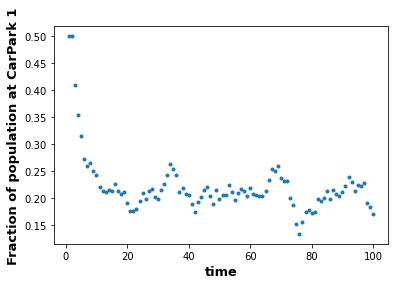

In [14]:
plotFractions(100,1)